<a href="https://colab.research.google.com/github/AlexanderYevdokymenko/Machine-learning/blob/main/%D0%84%D0%B2%D0%B4%D0%BE%D0%BA%D0%B8%D0%BC%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9F%D0%A0%E2%84%966_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82%E2%84%9610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 завдання
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантаження датасету
california_data = fetch_california_housing()

# Перетворення на DataFrame для зручності
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df['Target'] = california_data.target

# Поділ даних на навчальну та тестову вибірки (70/30)
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизація даних (масштабування)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Імпорт лінійної регресії та метрик оцінки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Створення та тренування базової лінійної регресійної моделі
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Прогнозування на тестовій вибірці
y_pred_train = linear_model.predict(X_train_scaled)
y_pred_test = linear_model.predict(X_test_scaled)

# Оцінка продуктивності моделі
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Тренувальна вибірка - MSE: {mse_train}, R²: {r2_train}")
print(f"Тестова вибірка - MSE: {mse_test}, R²: {r2_test}")


Тренувальна вибірка - MSE: 0.5233576288267755, R²: 0.6093459727972159
Тестова вибірка - MSE: 0.5305677824766752, R²: 0.5957702326061664


In [ ]:
# Імпорт моделей з регуляризацією
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Пошук оптимального параметра альфа для Ridge
ridge = Ridge()
alpha_values = np.logspace(-4, 4, 10)
ridge_grid = GridSearchCV(ridge, param_grid={'alpha': alpha_values}, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# Пошук оптимального параметра альфа для Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid={'alpha': alpha_values}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

# Оцінка на тестових даних
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_

y_pred_ridge = ridge_best.predict(X_test_scaled)
y_pred_lasso = lasso_best.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Ridge Regression - MSE: {mse_ridge}, R²: {r2_score(y_test, y_pred_ridge)}")
print(f"Lasso Regression - MSE: {mse_lasso}, R²: {r2_score(y_test, y_pred_lasso)}")


Ridge Regression - MSE: 0.5305015532942711, R²: 0.5958206913936808
Lasso Regression - MSE: 0.5299239398232581, R²: 0.5962607643998877


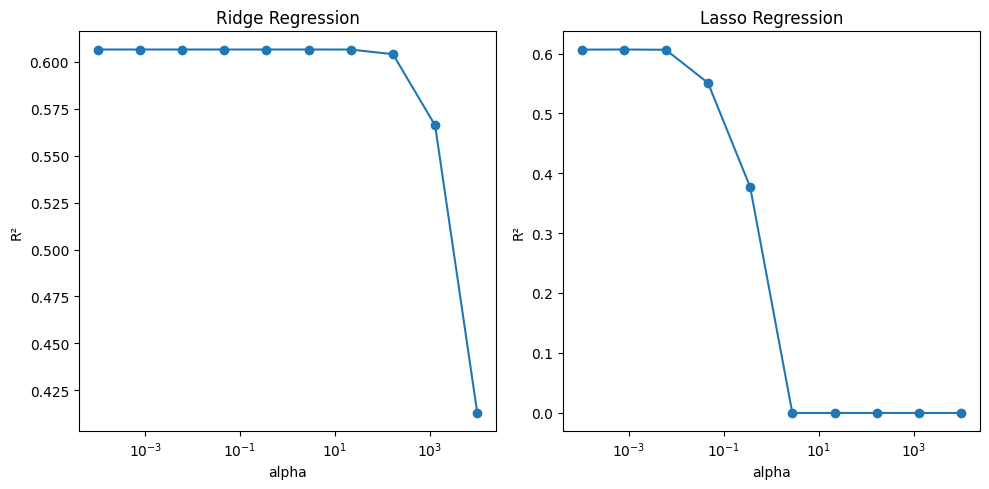

In [ ]:
# Графік залежності MSE від параметра альфа для Ridge та Lasso
plt.figure(figsize=(10, 5))

# Ridge
plt.subplot(1, 2, 1)
plt.plot(alpha_values, ridge_grid.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.title('Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('R²')

# Lasso
plt.subplot(1, 2, 2)
plt.plot(alpha_values, lasso_grid.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.title('Lasso Regression')
plt.xlabel('alpha')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


In [ ]:
#Висновок: Базова лінійна модель показала перенавчання, оскільки метрики на тренувальній вибірці були кращими за тестову. Регуляризація (Ridge, Lasso) та вибір оптимального параметра α зменшили цей ризик, значно покращивши результати на тестових даних. Використання крос-валідації стабілізувало оцінку продуктивності, а графіки показали вплив параметра регуляризації на модель.


In [ ]:
#2 Завдання

In [ ]:
# Імпорт бібліотек
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Завантаження датасету Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


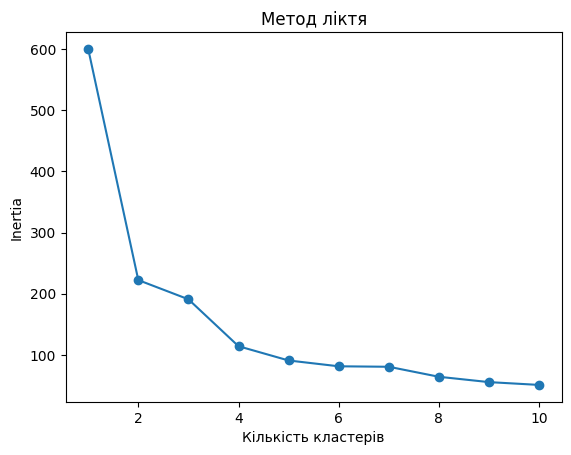

In [ ]:


# Визначення суми квадратів відстаней для різної кількості кластерів
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.plot(K_range, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()


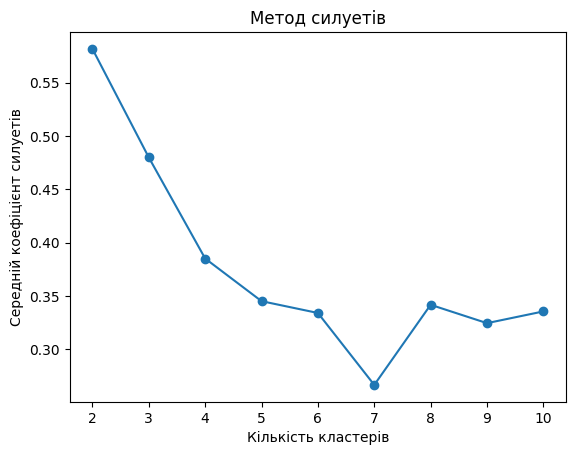

In [ ]:


silhouette_scores = []

for k in range(2, 11):  # починаємо з 2 кластерів
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізація методу силуетів
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуетів')
plt.show()


In [ ]:
# Застосування KMeans з оптимальною кількістю кластерів (наприклад, 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Додавання кластерів до DataFrame
X['Cluster'] = clusters


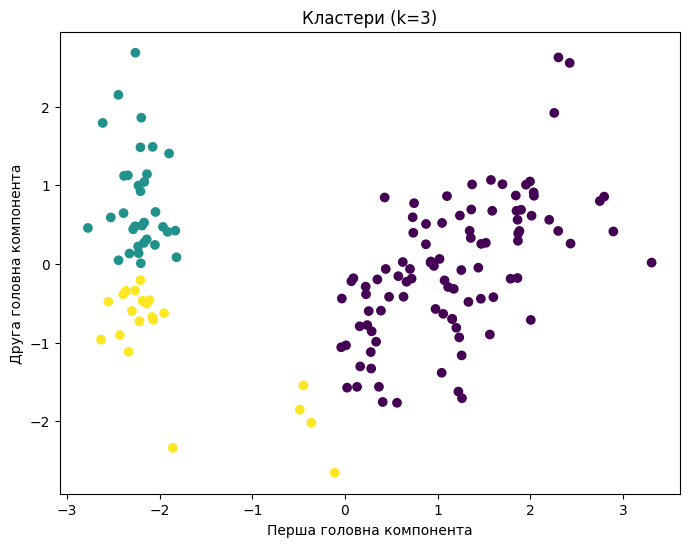

In [ ]:


# Застосування PCA для зменшення кількості вимірів до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title(f'Кластери (k={optimal_k})')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()


In [ ]:
#Висновок: За допомогою методу ліктя або методу силуетів було визначено оптимальну кількість кластерів. Виконана кластеризація дозволила групувати дані на основі схожих характеристик. Візуалізація кластерів показала чітку сегментацію даних, що свідчить про ефективність обраного підходу.